### Simple Regression Example

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'x': [32, 35, 39, 42, 43, 47],
                   'y': [102, 109, 137, 148, 150, 158]})

In [3]:
df

,x,y
0,32,102
1,35,109
2,39,137
3,42,148
4,43,150
5,47,158


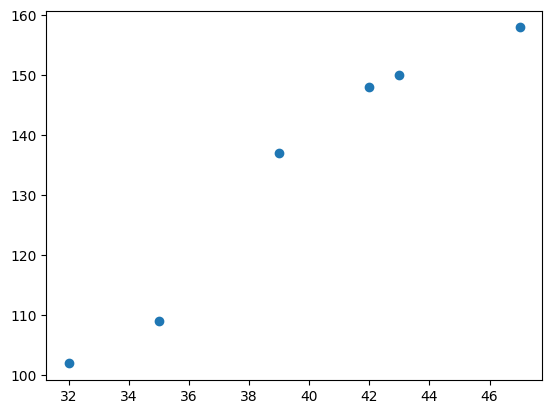

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])

What we need:
+ For beta 0 (the intercept) the equation is yhat - beta1 *(mean of x)

In [9]:
x_mean = df['x'].mean()
x_mean

np.float64(39.666666666666664)

In [10]:
y_mean = df['y'].mean()
y_mean

np.float64(134.0)